Multivariate Time Series Forecasting with LSTMs using TensorFlow 2 and Keras in Python

https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [25]:
time = np.arange(0, 100, 0.1)
sin1 = np.sin(2*time) #+ np.random.normal(scale=0.5, size=len(time))
sin2 = np.sin(time) #+ np.random.normal(scale=0.5, size=len(time))
cos = np.cos(time)

In [26]:
df = pd.DataFrame(dict(sine1=sin1, sine2=sin2, cos1=cos), index=time, columns=['sine1', 'sine2', 'cos1'])

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [38]:
train.iloc[0:(0 + 10), 0:2].values

array([[0.        , 0.        ],
       [0.19866933, 0.09983342],
       [0.38941834, 0.19866933],
       [0.56464247, 0.29552021],
       [0.71735609, 0.38941834],
       [0.84147098, 0.47942554],
       [0.93203909, 0.56464247],
       [0.98544973, 0.64421769],
       [0.9995736 , 0.71735609],
       [0.97384763, 0.78332691]])

In [27]:
df.head()

,sine1,sine2,cos1
0.0,0.000000,0.000000,1.000000
0.1,0.198669,0.099833,0.995004
0.2,0.389418,0.198669,0.980067
0.3,0.564642,0.295520,0.955336
0.4,0.717356,0.389418,0.921061


In [39]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps), 0:2].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [41]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cos1, time_steps)
X_test, y_test = create_dataset(test, test.cos1, time_steps)

print(X_train.shape, y_train.shape)

(790, 10, 2) (790,)


In [43]:
y_train

array([ 0.54030231,  0.45359612,  0.36235775,  0.26749883,  0.16996714,
        0.0707372 , -0.02919952, -0.12884449, -0.22720209, -0.32328957,
       -0.41614684, -0.5048461 , -0.58850112, -0.66627602, -0.73739372,
       -0.80114362, -0.85688875, -0.90407214, -0.94222234, -0.97095817,
       -0.9899925 , -0.99913515, -0.99829478, -0.98747977, -0.96679819,
       -0.93645669, -0.89675842, -0.84810003, -0.79096771, -0.7259323 ,
       -0.65364362, -0.57482395, -0.49026082, -0.40079917, -0.30733287,
       -0.2107958 , -0.11215253, -0.01238866,  0.08749898,  0.18651237,
        0.28366219,  0.37797774,  0.46851667,  0.55437434,  0.63469288,
        0.70866977,  0.77556588,  0.83471278,  0.88551952,  0.92747843,
        0.96017029,  0.98326844,  0.9965421 ,  0.99985864,  0.99318492,
        0.97658763,  0.95023259,  0.91438315,  0.86939749,  0.8157251 ,
        0.75390225,  0.68454667,  0.60835131,  0.52607752,  0.43854733,
        0.34663532,  0.25125984,  0.15337386,  0.05395542, -0.04

In [44]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [45]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 711 samples, validate on 79 samples
Epoch 1/30
711/711 [==============================] - 2s 3ms/sample - loss: 0.2126 - val_loss: 0.0942
Epoch 2/30
711/711 [==============================] - 0s 621us/sample - loss: 0.0499 - val_loss: 0.0153
Epoch 3/30
711/711 [==============================] - 1s 818us/sample - loss: 0.0115 - val_loss: 0.0013
Epoch 4/30
711/711 [==============================] - 1s 1ms/sample - loss: 7.3091e-04 - val_loss: 1.2404e-04
Epoch 5/30
711/711 [==============================] - 1s 744us/sample - loss: 1.2488e-04 - val_loss: 7.4440e-05
Epoch 6/30
711/711 [==============================] - 1s 941us/sample - loss: 0.0018 - val_loss: 0.0013
Epoch 7/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.0115 - val_loss: 7.9857e-04
Epoch 8/30
711/711 [==============================] - 1s 1ms/sample - loss: 5.7517e-04 - val_loss: 6.3908e-05
Epoch 9/30
711/711 [==============================] - 1s 945us/sample - loss: 6.0973e-05 - val_loss: 4.

In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred[0]

array([0.7784467], dtype=float32)

In [48]:
X_test[0]

array([[ 0.21942526, -0.99388865],
       [ 0.02122374, -0.99994369],
       [-0.1778239 , -0.99600761],
       [-0.36978227, -0.98211976],
       [-0.54699858, -0.95841889],
       [-0.70240779, -0.92514181],
       [-0.82981421, -0.88262103],
       [-0.92413856, -0.83128139],
       [-0.98162042, -0.77163586],
       [-0.99996817, -0.70428039]])

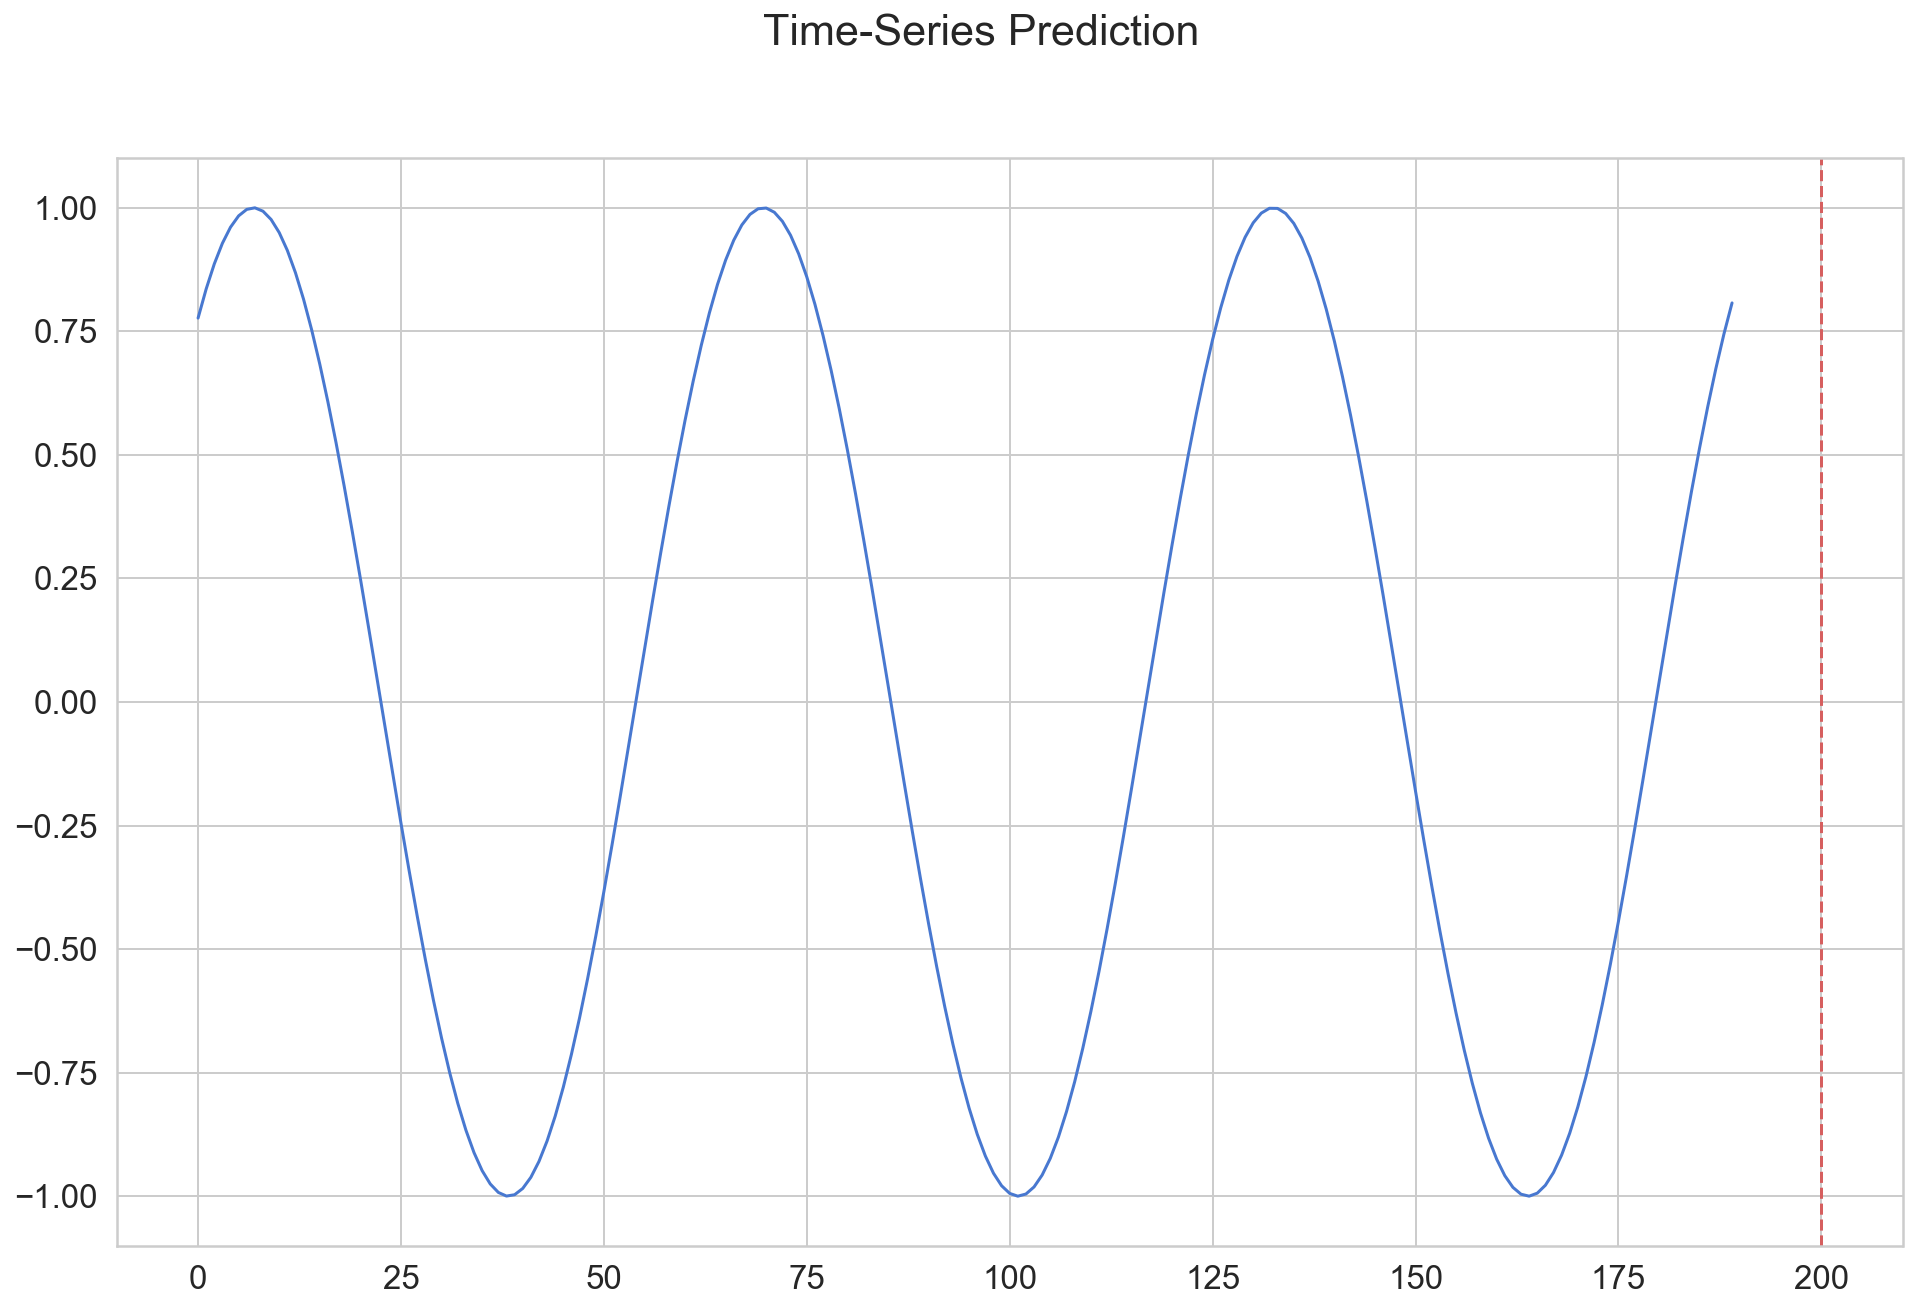

In [50]:
plt.axvline(x=test_size, c='r', linestyle='--')

# plt.plot(y_pred)
plt.plot(y_test)
plt.suptitle('Time-Series Prediction')
plt.show()

In [16]:
df.head()

,sine
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342


In [18]:
np.sin(0.4)

0.3894183423086505